# **1. Perkenalan Dataset**


- **Nama:** Abdi Jepri Bangun
- **Email:** abdijepri@gmail.com (a012ybf002@devacademy.id)
- **ID Dicoding:** a012ybf002 (Abdi Jepri Bangun)

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: **Brain stroke prediction dataset**  
  https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca dataset dan menampilkan 5 baris pertama
brain_df = pd.read_csv('/content/drive/MyDrive/LaskarAi/MSML/full_data.csv')
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
print("Ukuran dataset:", brain_df.shape)
print("\nInfo dataset:")
brain_df.info()

Ukuran dataset: (4981, 11)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<ipython-input-5-69078450>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=brain_df, x='work_type', order=brain_df['work_type'].value_counts().index, palette='Set3')


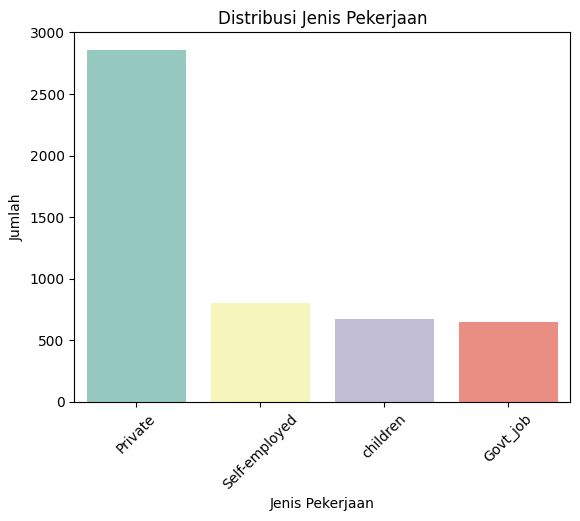

In [5]:
# Distribusi Pekerjaan
sns.countplot(data=brain_df, x='work_type', order=brain_df['work_type'].value_counts().index, palette='Set3')
plt.title("Distribusi Jenis Pekerjaan")
plt.xticks(rotation=45)
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Jumlah")
plt.show()

**Insight**
* Mayoritas data pekerjaan adalah tipe Private dengan jumlah hampir 3000.
* Disusul oleh Self-employed, children, dan Govt job yang jumlahnya lebih kecil dan hampir seimbang.
* Distribusi ini membantu memahami proporsi jenis pekerjaan di data yang dianalisis, yang bisa penting dalam analisis lanjutan seperti pengaruh pekerjaan terhadap kondisi stroke.

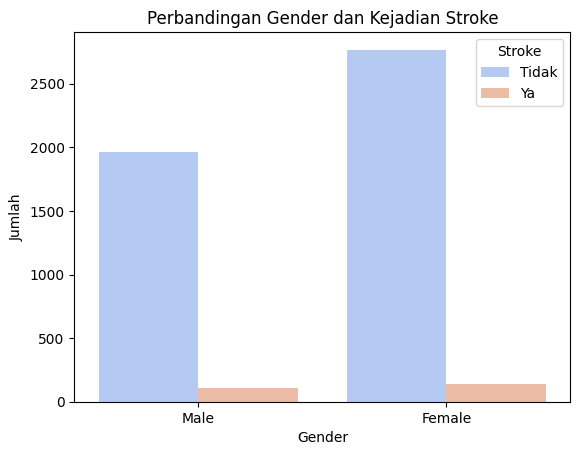

In [6]:
sns.countplot(data=brain_df, x='gender', hue='stroke', palette='coolwarm')
plt.title("Perbandingan Gender dan Kejadian Stroke")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.legend(title='Stroke', labels=['Tidak', 'Ya'])
plt.show()

**Insight**
* Jumlah individu tanpa stroke lebih tinggi secara signifikan dibandingkan dengan yang mengalami stroke, baik pada laki-laki maupun perempuan.
* Perempuan memiliki jumlah total yang lebih tinggi dibandingkan laki-laki dalam dataset ini.
* Kejadian stroke pada perempuan sedikit lebih banyak dibandingkan laki-laki, meskipun perbedaannya tidak terlalu besar.

<ipython-input-7-3179553254>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=brain_df, x='smoking_status', order=brain_df['smoking_status'].value_counts().index, palette='Set2')


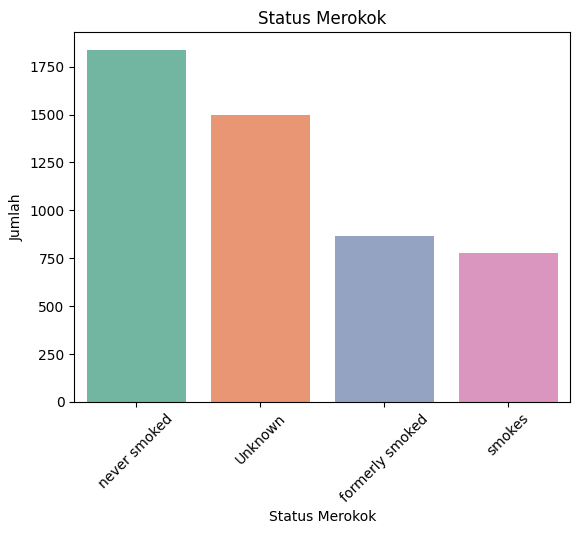

In [7]:
sns.countplot(data=brain_df, x='smoking_status', order=brain_df['smoking_status'].value_counts().index, palette='Set2')
plt.title("Status Merokok")
plt.xticks(rotation=45)
plt.xlabel("Status Merokok")
plt.ylabel("Jumlah")
plt.show()

**Insight**

Grafik "Status Merokok" menunjukkan distribusi status merokok dalam dataset:
* Never smoked (tidak pernah merokok) merupakan kelompok terbanyak.
* Unknown (tidak diketahui) berada di posisi kedua, menunjukkan adanya data yang tidak lengkap atau tidak tercatat.
* Formerly smoked (pernah merokok) dan smokes (masih merokok) masing-masing berada di posisi ketiga dan keempat, dengan jumlah relatif lebih sedikit.

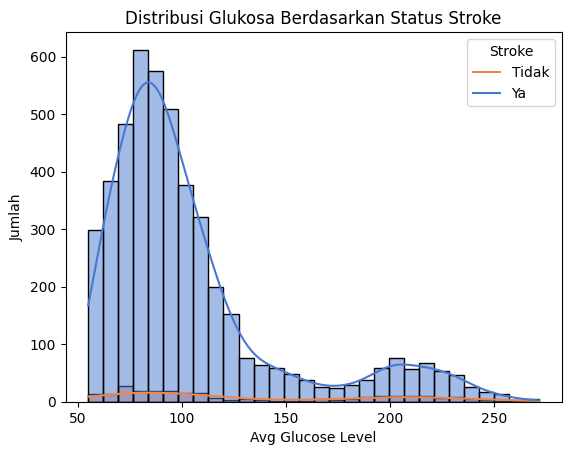

In [8]:
sns.histplot(data=brain_df, x='avg_glucose_level', hue='stroke', bins=30, kde=True, palette='muted')
plt.title("Distribusi Glukosa Berdasarkan Status Stroke")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Jumlah")
plt.legend(title='Stroke', labels=['Tidak', 'Ya'])
plt.show()

**Insight**

Grafik "Distribusi Glukosa Berdasarkan Status Stroke" memperlihatkan distribusi tingkat glukosa rata-rata berdasarkan status stroke:

* Sebagian besar individu, baik yang tidak stroke maupun yang stroke, memiliki rata-rata kadar glukosa antara 70 hingga 130 mg/dL.

* Distribusi individu tanpa stroke (garis oranye) dominan pada kadar glukosa rendah hingga sedang.

* Pada kadar glukosa yang lebih tinggi (sekitar 200 mg/dL ke atas), tampak sedikit peningkatan pada kejadian stroke (garis biru), meskipun jumlahnya tetap jauh lebih sedikit dibanding yang tidak stroke.

<Axes: >

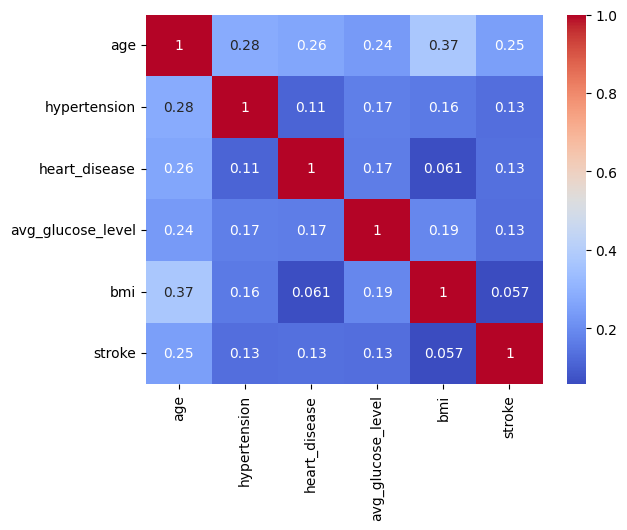

In [9]:
correlation = brain_df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

**Insight**

Korelasi terhadap kolom stroke:

* age: 0.25 → Korelasi tertinggi terhadap stroke. Usia lebih tua berhubungan dengan peningkatan risiko stroke.

* hypertension: 0.13

* heart_disease: 0.13

* avg_glucose_level: 0.13

* bmi: 0.057 → Korelasi sangat lemah terhadap stroke.

**Interpretasi**

 Interpretasi: Tidak ada variabel yang memiliki korelasi sangat kuat dengan stroke (r > 0.5), namun usia merupakan faktor yang paling relevan secara korelasi. Variabel lain seperti hipertensi, penyakit jantung, dan kadar glukosa menunjukkan pengaruh yang lemah tapi tetap positif.

 **Korelasi antar Variabel Lain**

* age dan bmi: 0.37 → Orang dengan usia lebih tinggi cenderung memiliki BMI lebih tinggi.

* age dengan faktor-faktor risiko lain (hipertensi, penyakit jantung, glukosa): korelasi moderat sekitar 0.24 - 0.28.

**Kesimpulan**

* Korelasi antara fitur-fitur dan stroke relatif rendah, yang menunjukkan bahwa stroke dipengaruhi oleh multifaktor kompleks yang mungkin tidak hanya tercermin dari korelasi linear sederhana.

* Namun, age, hypertension, heart disease, dan glucose masih penting secara klinis dan layak dipertimbangkan dalam model prediktif.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
print("Ukuran dataset:", brain_df.shape)
print("\nInfo dataset:")
brain_df.info()

Ukuran dataset: (4981, 11)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


###Menghapus atau Menangani Data Kosong (Missing Values)


In [11]:
print(brain_df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
brain_df = brain_df.dropna()

In [13]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### Menghapus Data Duplikat

In [14]:
duplicates = brain_df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

brain_df = brain_df.drop_duplicates()

Jumlah baris duplikat: 0


###  Binning (Pengelompokan Data)

In [15]:
bins = [0, 18, 40, 60, 100]
labels = ['Anak', 'Dewasa Muda', 'Dewasa', 'Lansia']
brain_df['age'] = pd.cut(brain_df['age'], bins=bins, labels=labels)

### Encoding Data Kategorikal

In [16]:
# Label Encoding sederhana
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','age']
le = LabelEncoder()

for col in categorical_cols:
    brain_df[col] = le.fit_transform(brain_df[col])

### Normalisasi atau Standarisasi Fitur Numerik

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
brain_df[['avg_glucose_level', 'bmi']] = scaler.fit_transform(brain_df[['avg_glucose_level', 'bmi']])

### Deteksi dan Penanganan Outlier (Opsional)

In [19]:
print(brain_df.head())
print(brain_df.shape)
print(brain_df.dtypes)

   gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1    3             0              1             1          1   
1       1    3             0              1             1          1   
2       0    1             0              0             1          1   
3       0    3             1              0             1          2   
4       1    3             0              0             1          1   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           2.723411  1.193238               1       1  
1               0          -0.000523  0.589390               2       1  
2               1           1.448529  0.869222               3       1  
3               0           1.512650 -0.662492               2       1  
4               1           1.780895  0.073909               1       1  
(4981, 11)
gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ev

In [23]:
brain_df.to_csv('/content/final_dataset.csv', index=False)